In [19]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-18,278.910004,282.459991,278.339996,280.519989,277.794739,20778000
1,2022-04-19,279.380005,286.170013,278.410004,285.299988,282.528290,22297700
2,2022-04-20,289.399994,289.700012,285.369995,286.359985,283.578003,22906700
3,2022-04-21,288.579987,293.299988,280.059998,280.809998,278.081940,29454600
4,2022-04-22,281.679993,283.200012,273.380005,274.029999,271.367798,29405800
...,...,...,...,...,...,...,...
246,2023-04-11,285.750000,285.980011,281.640015,282.829987,282.829987,27276600
247,2023-04-12,284.790009,287.010010,281.959991,283.489990,283.489990,27403400
248,2023-04-13,283.589996,289.899994,283.170013,289.839996,289.839996,24222700
249,2023-04-14,287.000000,288.480011,283.690002,286.140015,286.140015,20973900


In [21]:
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis = 'columns')

In [22]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2022-04-18,-1.609985,4.119995
2022-04-19,-5.919983,7.760009
2022-04-20,3.040009,4.330017
2022-04-21,7.769989,13.239990
2022-04-22,7.649994,9.820007


In [23]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0])

In [24]:
split_percentage = 0.8
split = int(split_percentage * len(df))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [25]:
cls = SVC().fit(X_train, y_train)

In [26]:
df['Predicted_Signal'] = cls.predict(X)
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal
Date,,,,,,,,,
2022-04-18,278.910004,282.459991,278.339996,280.519989,277.794739,20778000,-1.609985,4.119995,0
2022-04-19,279.380005,286.170013,278.410004,285.299988,282.528290,22297700,-5.919983,7.760009,1
2022-04-20,289.399994,289.700012,285.369995,286.359985,283.578003,22906700,3.040009,4.330017,0
2022-04-21,288.579987,293.299988,280.059998,280.809998,278.081940,29454600,7.769989,13.239990,0
2022-04-22,281.679993,283.200012,273.380005,274.029999,271.367798,29405800,7.649994,9.820007,0
...,...,...,...,...,...,...,...,...,...
2023-04-11,285.750000,285.980011,281.640015,282.829987,282.829987,27276600,2.920013,4.339996,0
2023-04-12,284.790009,287.010010,281.959991,283.489990,283.489990,27403400,1.300019,5.050019,0
2023-04-13,283.589996,289.899994,283.170013,289.839996,289.839996,24222700,-6.250000,6.729981,1


In [27]:
df['Return'] = df.Close.pct_change()

In [28]:
df['Strategy_Ret'] = df.Return * df.Predicted_Signal.shift(1)
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Ret
Date,,,,,,,,,,,
2022-04-18,278.910004,282.459991,278.339996,280.519989,277.794739,20778000,-1.609985,4.119995,0,NaN,NaN
2022-04-19,279.380005,286.170013,278.410004,285.299988,282.528290,22297700,-5.919983,7.760009,1,0.017040,0.000000
2022-04-20,289.399994,289.700012,285.369995,286.359985,283.578003,22906700,3.040009,4.330017,0,0.003715,0.003715
2022-04-21,288.579987,293.299988,280.059998,280.809998,278.081940,29454600,7.769989,13.239990,0,-0.019381,-0.000000
2022-04-22,281.679993,283.200012,273.380005,274.029999,271.367798,29405800,7.649994,9.820007,0,-0.024144,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-11,285.750000,285.980011,281.640015,282.829987,282.829987,27276600,2.920013,4.339996,0,-0.022668,-0.000000
2023-04-12,284.790009,287.010010,281.959991,283.489990,283.489990,27403400,1.300019,5.050019,0,0.002334,0.000000
2023-04-13,283.589996,289.899994,283.170013,289.839996,289.839996,24222700,-6.250000,6.729981,1,0.022399,0.000000


In [29]:
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Ret'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Ret,Cum_Ret
Date,,,,,,,,,,,,
2022-04-18,278.910004,282.459991,278.339996,280.519989,277.794739,20778000,-1.609985,4.119995,0,NaN,NaN,NaN
2022-04-19,279.380005,286.170013,278.410004,285.299988,282.528290,22297700,-5.919983,7.760009,1,0.017040,0.000000,0.017040
2022-04-20,289.399994,289.700012,285.369995,286.359985,283.578003,22906700,3.040009,4.330017,0,0.003715,0.003715,0.020755
2022-04-21,288.579987,293.299988,280.059998,280.809998,278.081940,29454600,7.769989,13.239990,0,-0.019381,-0.000000,0.001374
2022-04-22,281.679993,283.200012,273.380005,274.029999,271.367798,29405800,7.649994,9.820007,0,-0.024144,-0.000000,-0.022770
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-11,285.750000,285.980011,281.640015,282.829987,282.829987,27276600,2.920013,4.339996,0,-0.022668,-0.000000,0.066871
2023-04-12,284.790009,287.010010,281.959991,283.489990,283.489990,27403400,1.300019,5.050019,0,0.002334,0.000000,0.069205
2023-04-13,283.589996,289.899994,283.170013,289.839996,289.839996,24222700,-6.250000,6.729981,1,0.022399,0.000000,0.091604


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Ret,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2022-04-18,278.910004,282.459991,278.339996,280.519989,277.794739,20778000,-1.609985,4.119995,0,NaN,NaN,NaN,NaN
2022-04-19,279.380005,286.170013,278.410004,285.299988,282.528290,22297700,-5.919983,7.760009,1,0.017040,0.000000,0.017040,0.000000
2022-04-20,289.399994,289.700012,285.369995,286.359985,283.578003,22906700,3.040009,4.330017,0,0.003715,0.003715,0.020755,0.003715
2022-04-21,288.579987,293.299988,280.059998,280.809998,278.081940,29454600,7.769989,13.239990,0,-0.019381,-0.000000,0.001374,0.003715
2022-04-22,281.679993,283.200012,273.380005,274.029999,271.367798,29405800,7.649994,9.820007,0,-0.024144,-0.000000,-0.022770,0.003715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-11,285.750000,285.980011,281.640015,282.829987,282.829987,27276600,2.920013,4.339996,0,-0.022668,-0.000000,0.066871,0.199387
2023-04-12,284.790009,287.010010,281.959991,283.489990,283.489990,27403400,1.300019,5.050019,0,0.002334,0.000000,0.069205,0.199387
2023-04-13,283.589996,289.899994,283.170013,289.839996,289.839996,24222700,-6.250000,6.729981,1,0.022399,0.000000,0.091604,0.199387


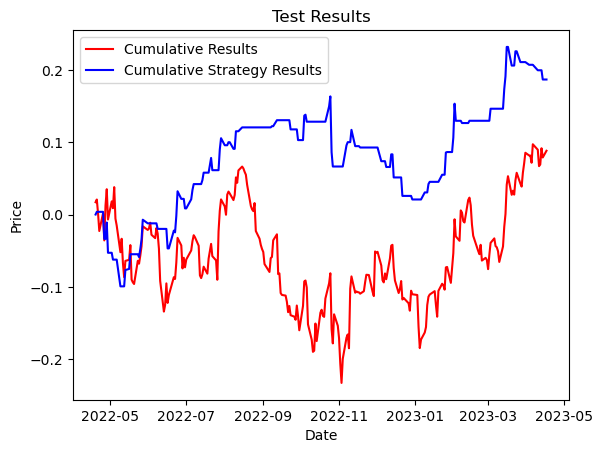

In [31]:
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red' , label = 'Cumulative Results')
plt.plot(df['Cum_Strategy'],color='blue', label = 'Cumulative Strategy Results')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Test Results')
plt.show()

In [32]:
df['Predicted_Close'] = df['Close'] + df['Open-Close'].shift(-1) * df['Predicted_Signal']
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Ret,Cum_Ret,Cum_Strategy,Predicted_Close
Date,,,,,,,,,,,,,,
2022-04-18,278.910004,282.459991,278.339996,280.519989,277.794739,20778000,-1.609985,4.119995,0,NaN,NaN,NaN,NaN,280.519989
2022-04-19,279.380005,286.170013,278.410004,285.299988,282.528290,22297700,-5.919983,7.760009,1,0.017040,0.000000,0.017040,0.000000,288.339997
2022-04-20,289.399994,289.700012,285.369995,286.359985,283.578003,22906700,3.040009,4.330017,0,0.003715,0.003715,0.020755,0.003715,286.359985
2022-04-21,288.579987,293.299988,280.059998,280.809998,278.081940,29454600,7.769989,13.239990,0,-0.019381,-0.000000,0.001374,0.003715,280.809998
2022-04-22,281.679993,283.200012,273.380005,274.029999,271.367798,29405800,7.649994,9.820007,0,-0.024144,-0.000000,-0.022770,0.003715,274.029999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-11,285.750000,285.980011,281.640015,282.829987,282.829987,27276600,2.920013,4.339996,0,-0.022668,-0.000000,0.066871,0.199387,282.829987
2023-04-12,284.790009,287.010010,281.959991,283.489990,283.489990,27403400,1.300019,5.050019,0,0.002334,0.000000,0.069205,0.199387,283.489990
2023-04-13,283.589996,289.899994,283.170013,289.839996,289.839996,24222700,-6.250000,6.729981,1,0.022399,0.000000,0.091604,0.199387,290.699981


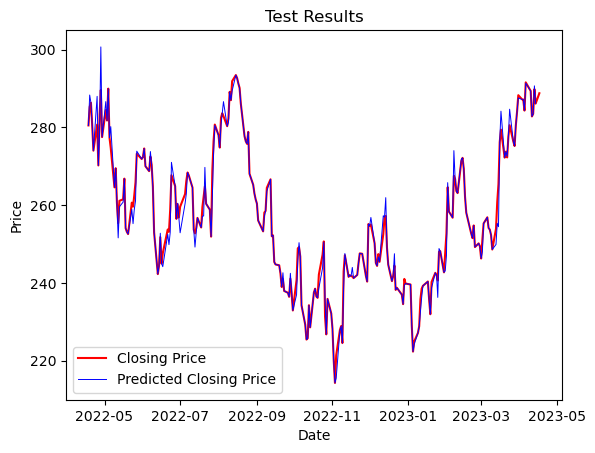

In [33]:
plt.plot(df['Close'],color='red', label = 'Closing Price')
plt.plot(df['Predicted_Close'],color='blue', label = 'Predicted Closing Price', linewidth = 0.7)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Test Results')
plt.show()

In [34]:
last_row = df.iloc[-1]
last_input = np.array([[last_row['Open-Close'], last_row['High-Low']]])
next_signal = cls.predict(last_input)[0]
next_open = df.iloc[-1]['Open']
next_close = next_open + (next_signal * last_row['Open-Close'])
print('Predicted next day closing price:', next_close)

Predicted next day closing price: 289.929993


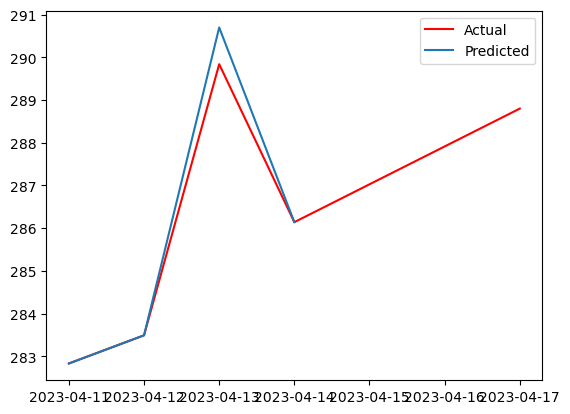

In [35]:
next_week = df.iloc[-5:]
next_week['Predicted_Signal'] = cls.predict(next_week[['Open-Close', 'High-Low']])
next_week['Predicted_Close'] = next_week['Close'] + next_week['Open-Close'].shift(-1) * next_week['Predicted_Signal']
next_week = next_week[['Close', 'Predicted_Close']]
plt.plot(next_week['Close'], label='Actual', color = 'Red')
plt.plot(next_week['Predicted_Close'], label='Predicted')
plt.legend()
plt.show()